# CS533 PA1: Data Exploration, Manipulation, and Evaluation

### In this PA, we aim to learn how to explore, manipulate, and evaluate the LLM survey dataset.
### Please complete the following PA (160 pts) and mention your name here.

### Name: AGNES NAMYALO


### Link to the preprint report (10 pts): 

In [1]:
# Importing the basic libraries we will require for the project

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import csv,json;
import os;
import openpyxl;

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn import tree;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix;
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# Load dataset (10 pts)

data_path = './data/survey_data2.csv'   #path where the dataset is located
# TODO: Load the dataset using pandas "read_csv" function. (10 pts)
data_df=pd.read_csv(data_path)

data_df.head()


,Taxonomy,Title,Authors,Release Date,Links,Paper ID,Categories,Summary
0,Comprehensive,A Comprehensive Survey of AI-Generated Content...,"Yihan Cao, Siyu Li, Yixin Liu, Zhiling Yan, Yu...",7-Mar-23,https://arxiv.org/abs/2303.04226,2303.04226,"cs.AI, cs.CL, cs.LG","Recently, ChatGPT, along with DALL-E-2 and Cod..."
1,Comprehensive,Language Model Behavior: A Comprehensive Survey,"Tyler A. Chang, Benjamin K. Bergen",20-Mar-23,https://arxiv.org/abs/2303.11504,2303.11504,cs.CL,Transformer language models have received wide...
2,Comprehensive,A Survey of Large Language Models,"Wayne Xin Zhao, Kun Zhou, Junyi Li, Tianyi Tan...",31-Mar-23,https://arxiv.org/abs/2303.18223,2303.18223,"cs.CL, cs.AI","Language is essentially a complex, intricate s..."
3,Comprehensive,"One Small Step for Generative AI, One Giant Le...","Chaoning Zhang, Chenshuang Zhang, Chenghao Li,...",4-Apr-23,https://arxiv.org/abs/2304.06488,2304.06488,"cs.CY, cs.AI, cs.CL, cs.CV, cs.LG",OpenAI has recently released GPT-4 (a.k.a. Cha...
4,Comprehensive,Summary of ChatGPT-Related Research and Perspe...,"Yiheng Liu, Tianle Han, Siyuan Ma, Jiayue Zhan...",4-Apr-23,https://arxiv.org/abs/2304.01852,2304.01852,cs.CL,This paper presents a comprehensive survey of ...


## Data Exploration

In [3]:
# Convert 'Date' column to datetime type
data_df['Release Date'] = pd.to_datetime(data_df['Release Date'])

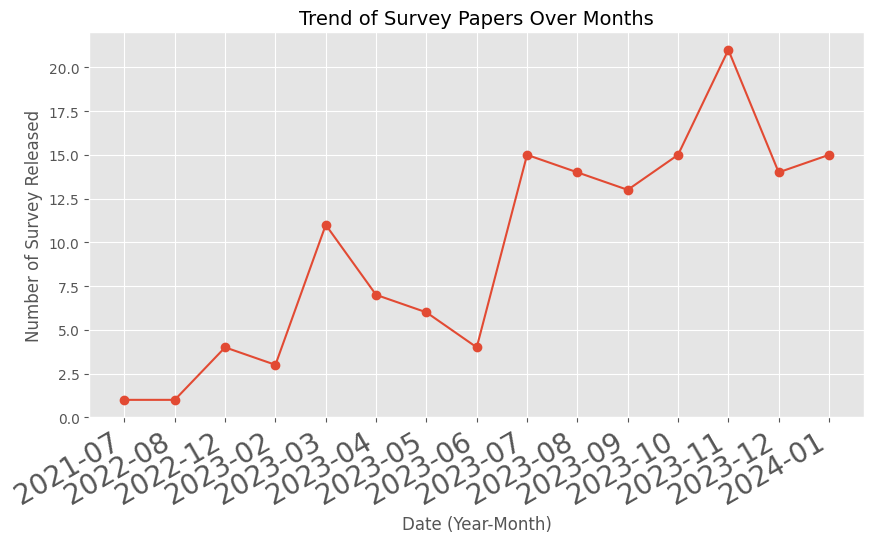

In [4]:
# Analyze the trends over time (20 pts)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def group_papers_by_month(data_df):
    # TODO: Use pandas "groupby" function to group the number of papers by year and month. (10 pts)
    # Group by year and month
    surveys_per_month= data_df['Release Date'].groupby(data_df['Release Date'].dt.to_period("M")).agg('count').reset_index(name='Number of Surveys')
    
    return surveys_per_month


def plot_survey_trends(surveys_per_month, fig_path):
    # TODO: plot the trends of survey papers over months. (5 pts)
    plt.figure(figsize=(10, 5))
    plt.title('Trend of Survey Papers Over Months', fontsize=14)
    plt.plot(surveys_per_month['Release Date'].astype(str), surveys_per_month['Number of Surveys'], marker='o')
    plt.xlabel('Date (Year-Month)', fontsize=12)
    plt.ylabel('Number of Survey Released', fontsize=12)
    plt.xticks(rotation=30, fontsize=20, ha='right')
    plt.savefig(fig_path, bbox_inches='tight')
    plt.show()
    

fig_path = './figures/fig_survey_trends.pdf'
surveys_per_month = group_papers_by_month(data_df)
plot_survey_trends(surveys_per_month, fig_path)

# Question: In the "surveys_per_month" table, what is the mean value of the number of surveys per month? (5 pts)
# Answer: 9.6
# hints: Use ".describe()" function to generate descriptive statistics.



In [5]:
surveys_per_month.describe()

,Number of Surveys
count,15.000000
mean,9.600000
std,6.231258
min,1.000000
25%,4.000000
50%,11.000000
75%,14.500000
max,21.000000


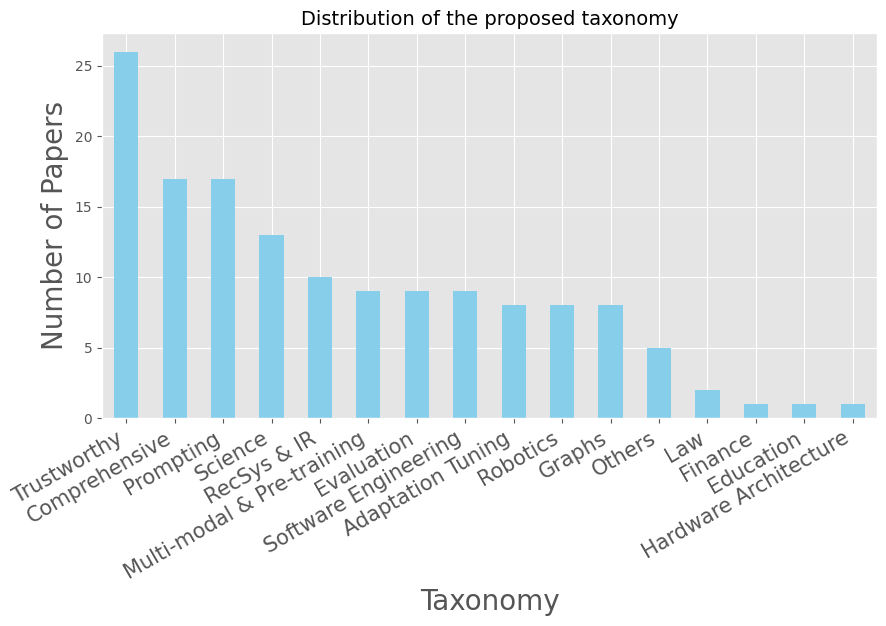

In [6]:
# Analyze the distribution of the proposed taxonomy (20 pts)

def plot_taxonomy_dist(tax_df, fig_path):
    # TODO: plot the distribution of the proposed taxonomy via bar chart. (15 pts)
    # Count the occurrences of each taxonomy
    taxonomy_counts = tax_df.value_counts()
    # Plot the distribution of papers across different categories
    plt.figure(figsize=(10, 5))
    taxonomy_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Taxonomy', fontsize=20)
    plt.ylabel('Number of Papers', fontsize=20)
    plt.xticks(rotation=30, fontsize=15, ha='right')
    plt.title('Distribution of the proposed taxonomy', fontsize=14)
    plt.grid(True)
    #plt.tight_layout()
    plt.savefig(fig_path, bbox_inches='tight')
    plt.show()

tax_fig_path = './figures/fig_tax_dist.pdf'
plot_taxonomy_dist(data_df['Taxonomy'], tax_fig_path)

# Question: How many survey papers were assigned to the "Trustworthy" category? (5 pts)
# Answer: 26
# hints: Use ".value_counts()" function to count the frequency.


In [7]:
data_df['Taxonomy'].value_counts()

Taxonomy
Trustworthy                   26
Comprehensive                 17
Prompting                     17
Science                       13
RecSys & IR                   10
Multi-modal & Pre-training     9
Evaluation                     9
Software Engineering           9
Adaptation Tuning              8
Robotics                       8
Graphs                         8
Others                         5
Law                            2
Finance                        1
Education                      1
Hardware Architecture          1
Name: count, dtype: int64

In [8]:
from collections import Counter

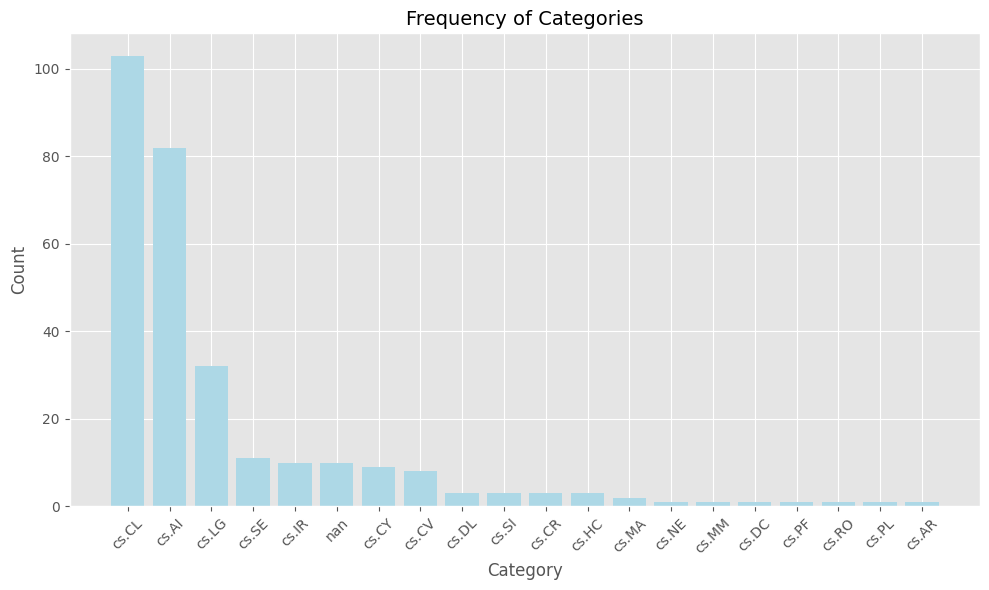

In [9]:
# Further exploration (20 pts)
# TODO: In addition to the above analysis, please use the methods that we learned in this course to analyze and visualize the datasets.

data_df['Categories'] = data_df['Categories'].astype(str)

# Split the 'Category' column by commas and expand into a list of lists
Categories_split = data_df['Categories'].str.split(', ')

# Flatten the list of lists into a single list containing all tags
all_Categories = [Category for sublist in Categories_split for Category in sublist]

#Counting the occurrences of each category using Counter
category_counts = Counter(all_Categories)

#Convert the counts into a DataFrame for easy manipulation
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])

#Sorting the DataFrame by count for better visualization
category_counts_df = category_counts_df.sort_values(by='Count', ascending=False)

#Plot the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts_df['Category'], category_counts_df['Count'], color='lightblue')
plt.title('Frequency of Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PDF file at the specified path
output_path = './figures/Category.pdf'
plt.savefig(output_path, format='pdf')

plt.show()



## Data Manipulation

In [10]:
# Build a feature matrix (30 pts)
from sklearn.feature_extraction.text import TfidfVectorizer

def build_feature_matrix(data_df):

    """Build a feature matrix."""
    # TODO: Vectorize the 'Title' and 'Summary' using TF-IDF (10 pts)
    # The TF-IDF matrix is a sparse matrix {rows: documents; columns: words}, whose elements are the TF-IDF values of the corresponding words in the documents.
    # This matrix represents text data as a numerical matrix, preserving the importance information of the words. 
    tfidf_vectorizer_title = TfidfVectorizer(stop_words='english')
    tfidf_vectorizer_summary = TfidfVectorizer(stop_words='english')

    title_tfidf = tfidf_vectorizer_title.fit_transform(data_df['Title'])
    summary_tfidf = tfidf_vectorizer_summary.fit_transform(data_df['Summary'])  

    # TODO: Apply One-hot embedding to 'Categories' (10 pts)

    categories_split = data_df['Categories'].str.split(', ', expand=True)
    categories_encoded = pd.get_dummies(categories_split, prefix='')

    # TODO: Combine all the features (10 pts)
    feature_matrix = pd.DataFrame.sparse.from_spmatrix(title_tfidf)
    feature_matrix = pd.concat([feature_matrix, pd.DataFrame.sparse.from_spmatrix(summary_tfidf)], axis=1)
    feature_matrix = pd.concat([feature_matrix, categories_encoded], axis=1)

    return feature_matrix

feature_matrix = build_feature_matrix(data_df)
feature_matrix


,0,1,2,3,4,5,6,7,8,9,...,_cs.CV,_cs.HC,_cs.LG,_cs.MA,_cs.MM,_cs.PF,_cs.PL,_cs.SI,_cs.LG,_cs.MA
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
140,0.353135,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
141,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
142,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Preprocess the feature matrix (30 pts)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

feature_matrix.columns = feature_matrix.columns.astype(str)

# TODO: Normalize the data (10 pts)
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the One-Hot Encoded Data (excluding the 'Paper ID' column)
#feature_matrix_normalized = feature_matrix.copy()
feature_matrix.iloc[:, 1:] = scaler.fit_transform(feature_matrix.iloc[:, 1:])

print("\nMin-Max Normalized Data:")
feature_matrix

# TODO: Encode the labels (10 pts)

label_encoder = LabelEncoder()

feature_matrix = feature_matrix.apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# TODO: Split the dataset (10 pts)
TEST_RATIO = 0.4

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, data_df['Taxonomy'], test_size=0.4, random_state=42)
#train_df, test_df = train_test_split(df, test_size=TEST_RATIO, random_state=42)



Min-Max Normalized Data:


In [12]:
y_train.head()

80            Evaluation
140               Others
47             Prompting
30     Adaptation Tuning
112             Robotics
Name: Taxonomy, dtype: object

Task is to classify the research papers into different research areas or topics based on their attributes, then the taxonomy column (which typically represents the paper's category or field) would be the target column. This is the most likely target if your goal is to predict the paper's category.

##  Data Evaluation

LOGISTIC REGRESSION

In [13]:
# TODO: Employ any models or methods, e.g., ML or DL models, to analyze the datasets. (10 pts)
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.22413793103448276
                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       0.25      0.25      0.25         8
                 Education       0.00      0.00      0.00         0
                Evaluation       0.29      0.67      0.40         3
                    Graphs       0.00      0.00      0.00         4
                       Law       0.00      0.00      0.00         0
Multi-modal & Pre-training       0.33      0.17      0.22         6
                    Others       0.00      0.00      0.00         0
                 Prompting       0.20      0.17      0.18         6
               RecSys & IR       0.00      0.00      0.00         1
                  Robotics       0.33      0.25      0.29         4
                   Science       0.33      0.43      0.38         7
      Software Engineering       0.00      0.00      0.00         4
               Tr

In [14]:
# TODO: Evaluate performance using appropriate metrics, such as accuracy. (10 pts)
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.22413793103448276
                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       0.25      0.25      0.25         8
                 Education       0.00      0.00      0.00         0
                Evaluation       0.29      0.67      0.40         3
                    Graphs       0.00      0.00      0.00         4
                       Law       0.00      0.00      0.00         0
Multi-modal & Pre-training       0.33      0.17      0.22         6
                    Others       0.00      0.00      0.00         0
                 Prompting       0.20      0.17      0.18         6
               RecSys & IR       0.00      0.00      0.00         1
                  Robotics       0.33      0.25      0.29         4
                   Science       0.33      0.43      0.38         7
      Software Engineering       0.00      0.00      0.00         4
               Tr

In [17]:
# TODO: New contributions (additional 20 pts on top of the total points)
# New contributions can be: 1. Update the datasets; 2. Evaluate new methods (e.g., prompting in LLMs); 3. Solve the class-imbalanced problems.


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#Handle Class Imbalance


model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.46551724137931033
                            precision    recall  f1-score   support

         Adaptation Tuning       1.00      0.25      0.40         4
             Comprehensive       1.00      0.25      0.40         8
                Evaluation       0.33      0.33      0.33         3
                    Graphs       1.00      0.25      0.40         4
Multi-modal & Pre-training       0.00      0.00      0.00         6
                 Prompting       0.38      0.83      0.53         6
               RecSys & IR       0.50      1.00      0.67         1
                  Robotics       0.75      0.75      0.75         4
                   Science       0.75      0.43      0.55         7
      Software Engineering       1.00      0.25      0.40         4
               Trustworthy       0.35      0.82      0.49        11

                  accuracy                           0.47        58
                 macro avg       0.64      0.47      0.45        58
              we

optimizing the performance of the logistic regression model by tuning hyperparameters like C (the regularization strength) using GridSearchCV.

In [18]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Accuracy: 0.5
                            precision    recall  f1-score   support

         Adaptation Tuning       1.00      0.25      0.40         4
             Comprehensive       0.75      0.38      0.50         8
                Evaluation       0.33      0.33      0.33         3
                    Graphs       1.00      0.25      0.40         4
Multi-modal & Pre-training       0.00      0.00      0.00         6
                 Prompting       0.36      0.83      0.50         6
               RecSys & IR       0.50      1.00      0.67         1
                  Robotics       0.75      0.75      0.75         4
                   Science       0.80      0.57      0.67         7
      Software Engineering       1.00      0.25      0.40         4
               Trustworthy       0.39      0.82      0.53        11

                  accuracy                           0.50        58
                 macro avg       0.63      0.49      0

In [19]:

# Load the Excel file
file_path = './logistic_results.xlsx'

# Read the Excel file into a pandas DataFrame
df_logistic = pd.read_excel(file_path)

# Display the DataFrame
df_logistic

,Category,precision,recall,f1-score
0,Adaptation Tuning,0.33,0.25,0.29
1,omprehensive,1.00,0.25,0.40
2,Evaluation,0.50,0.67,0.57
3,Graphs,1.00,0.75,0.86
4,Law,0.00,0.00,0.00
5,Multi-modal & Pre-training,0.25,0.17,0.20
6,Others,0.00,0.00,0.00
7,Prompting,0.42,0.83,0.56
8,ecSys & IR,0.50,1.00,0.67
9,Robotics,0.67,1.00,0.80


<Figure size 1000x2000 with 0 Axes>

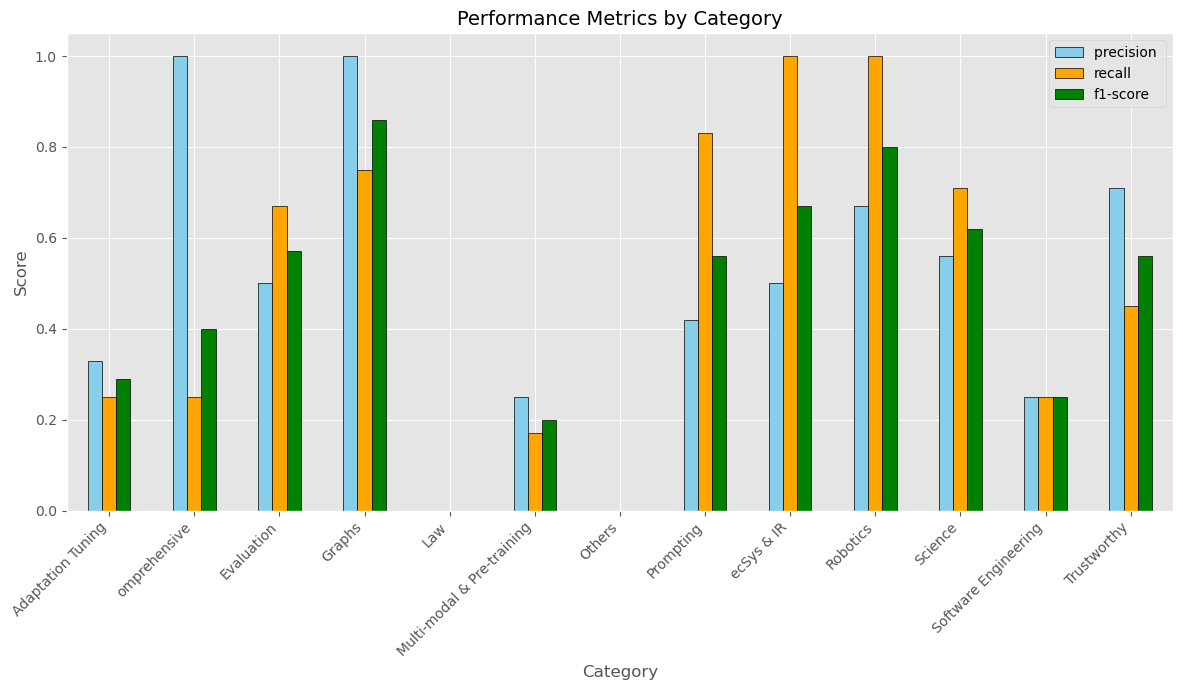

In [20]:
# Set the figure size
plt.figure(figsize=(10, 20))

# Plot Precision, Recall, and F1-score for each category
df_logistic.plot(x='Category', y=['precision ', 'recall', 'f1-score'], kind='bar', figsize=(12, 7), color=['skyblue', 'orange', 'green'], edgecolor='black')

# Adding title and labels
plt.title('Performance Metrics by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('./figures/performance_metrics.pdf', format='pdf')

# Optionally, display the plot
plt.show()

SVM


In [21]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       0.22      0.25      0.24         8
                Evaluation       0.29      0.67      0.40         3
                    Graphs       0.00      0.00      0.00         4
                       Law       0.00      0.00      0.00         0
Multi-modal & Pre-training       0.00      0.00      0.00         6
                    Others       0.00      0.00      0.00         0
                 Prompting       0.07      0.17      0.10         6
               RecSys & IR       0.00      0.00      0.00         1
                  Robotics       0.00      0.00      0.00         4
                   Science       0.43      0.43      0.43         7
      Software Engineering       0.00      0.00      0.00         4
               Trustworthy       0.43      0.27      0.33        11

                  accuracy                    

In [22]:
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       1.00      0.12      0.22         8
                Evaluation       0.00      0.00      0.00         3
                    Graphs       0.00      0.00      0.00         4
Multi-modal & Pre-training       0.00      0.00      0.00         6
                 Prompting       0.57      0.67      0.62         6
               RecSys & IR       1.00      1.00      1.00         1
                  Robotics       0.00      0.00      0.00         4
                   Science       1.00      0.29      0.44         7
      Software Engineering       0.00      0.00      0.00         4
               Trustworthy       0.23      1.00      0.38        11

                  accuracy                           0.33        58
                 macro avg       0.35      0.28      0.24        58
              weighted avg       0.38      0.3

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Predict and evaluate
predictions = best_model.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, predictions))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       1.00      0.12      0.22         8
                Evaluation       0.00      0.00      0.00         3
                    Graphs       0.00      0.00      0.00         4
Multi-modal & Pre-training       0.00      0.00      0.00         6
                 Prompting       0.57      0.67      0.62         6
               RecSys & IR       1.00      1.00      1.00         1
                  Robotics       0.00      0.00      0.00         4
                   Science       1.00      0.29      0.44         7
      Software Engineering       0.00      0.00      0.00         4
               Trustworthy       0.23      1.00      0.38        11

                  accuracy                           0.33        58
                 macro avg       0.35      0.28 

RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       0.20      0.12      0.15         8
                Evaluation       0.67      0.67      0.67         3
                    Graphs       0.00      0.00      0.00         4
Multi-modal & Pre-training       0.00      0.00      0.00         6
                 Prompting       0.30      0.50      0.37         6
               RecSys & IR       0.33      1.00      0.50         1
                  Robotics       0.00      0.00      0.00         4
                   Science       1.00      0.14      0.25         7
      Software Engineering       1.00      0.25      0.40         4
               Trustworthy       0.26      0.82      0.39        11

                  accuracy                           0.31        58
                 macro avg       0.34      0.32      0.25        58
              weighted avg       0.34      0.3

In [25]:
model = RandomForestClassifier(max_depth=10, max_features='sqrt')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

                            precision    recall  f1-score   support

         Adaptation Tuning       0.00      0.00      0.00         4
             Comprehensive       0.33      0.12      0.18         8
                Evaluation       0.50      0.33      0.40         3
                    Graphs       1.00      0.50      0.67         4
Multi-modal & Pre-training       0.00      0.00      0.00         6
                 Prompting       0.22      0.33      0.27         6
               RecSys & IR       1.00      1.00      1.00         1
                  Robotics       0.00      0.00      0.00         4
                   Science       1.00      0.14      0.25         7
      Software Engineering       1.00      0.25      0.40         4
               Trustworthy       0.26      0.91      0.40        11

                  accuracy                           0.33        58
                 macro avg       0.48      0.33      0.32        58
              weighted avg       0.42      0.3

## Bonus -- solved class imbalanced problems

In [ ]:
# TODO: New contributions (additional 20 pts on top of the total points)
# New contributions can be: 1. Update the datasets; 2. Evaluate new methods (e.g., prompting in LLMs); 3. Solve the class-imbalanced problems.
